In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [4]:
df[['CRIM','ZN','INDUS','CHAS','AGE','LSTAT']] = df[['CRIM','ZN','INDUS','CHAS','AGE','LSTAT']].fillna(df[['CRIM','ZN','INDUS','CHAS','AGE','LSTAT']].mean())


In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
x=df.drop('MEDV',axis=1)
y=df['MEDV']

In [7]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [9]:
model = Sequential()

model.add(Dense(128,input_shape=(13,),activation='relu',name='input'))
model.add(Dense(64,activation='relu',name='layer1'))
model.add(Dense(1,activation='linear',name='output'))

model.compile(optimizer='adam', loss='mse',metrics='mae')
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 128)               1792      
                                                                 
 layer2 (Dense)              (None, 64)                8256      
                                                                 
 output (Dense)              (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.fit(xtrain,ytrain,epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 3ms/step - loss: 63.9477 - mae: 6.3046
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 60.0514 - mae: 5.9322
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 39.5721 - mae: 4.6082
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 39.9758 - mae: 4.4687
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 37.1961 - mae: 4.3152
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 35.2368 - mae: 4.1203
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 35.3714 - mae: 4.0629
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 36.5650 - mae: 4.3403
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 35.9047 - mae: 4.1682
Epoch 10/100
12/12 [==============================] - 0s 4ms/step - loss: 40.4734 - mae: 4.4273
Epoch 11/100
12/12 [=============================

In [18]:
predictions=model.predict(xtest)

5/5 [==============================] - 0s 2ms/step


In [20]:
output=model.evaluate(xtest,ytest)

5/5 [==============================] - 0s 3ms/step - loss: 38.8871 - mae: 4.0976


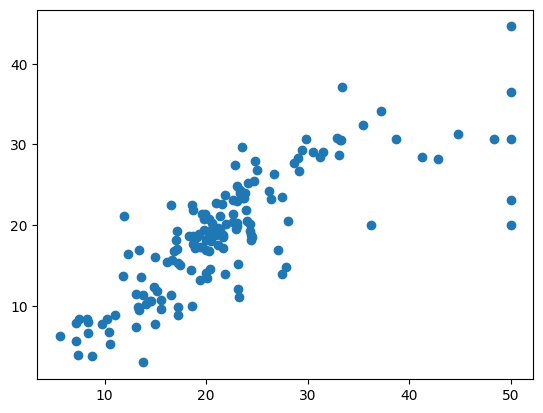

In [19]:
plt.scatter(ytest,predictions)

In [24]:
print(f"Mean squared error : {output[0]}",
      f"Mean absolute error : {output[1]}",sep="\n")

Mean squared error : 38.88711166381836
Mean absolute error : 4.0975565910339355
